In [62]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import hashlib
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL,
                       housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz ")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [4]:
fetch_housing_data()

In [5]:
housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity" ].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
%matplotlib inline

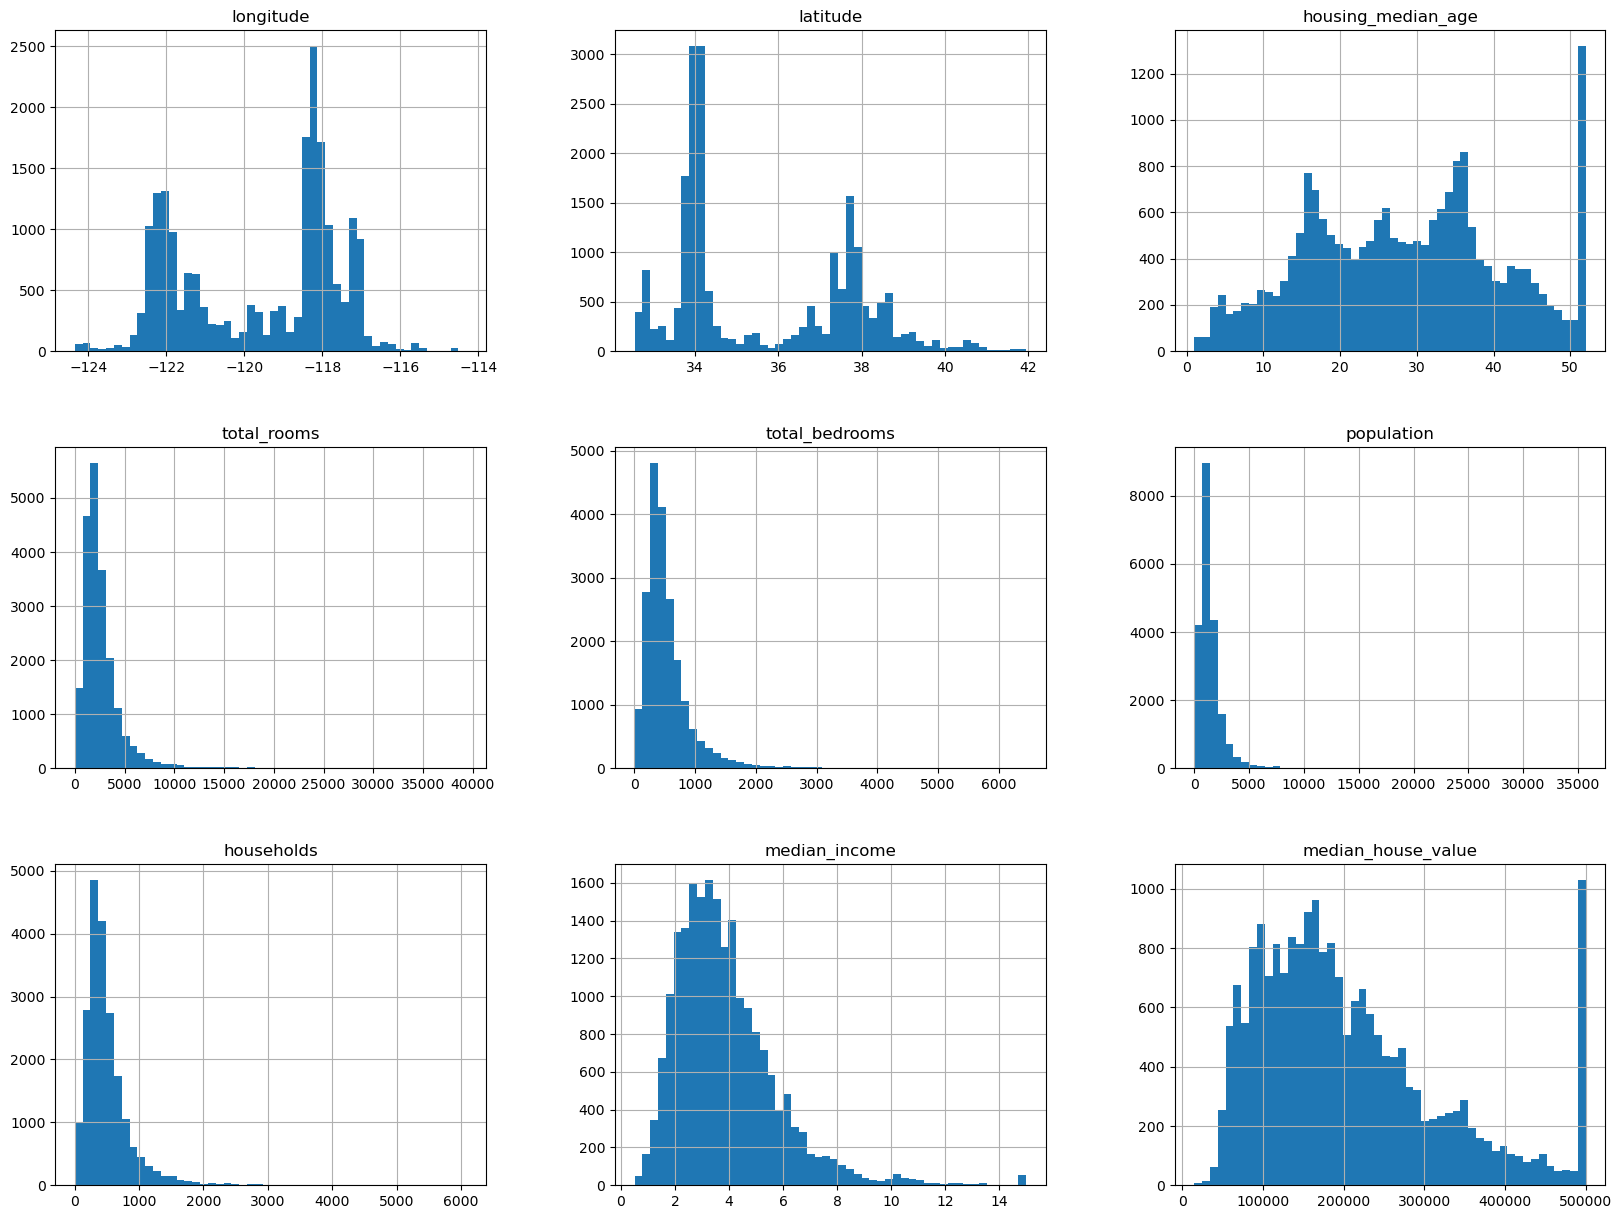

In [13]:
import matplotlib.pyplot as plt
housing.hist (bins=50,figsize= (20, 15))
plt.show ()

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
import numpy as np

In [16]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(housing, 0.2)

In [18]:
print(len(train_set), " train +", len(test_set), "test")

16512  train + 4128 test


In [19]:
import hashlib


def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column,
                           hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:
                            test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
housing_with_id = housing.reset_index()  # добавляет столбец ' index '
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [21]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [22]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [24]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [25]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [29]:
strat_train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.575635,2.001828,-124.3500,-121.80000,-118.51000,-118.010000,-114.3100
latitude,16512.0,35.639314,2.137963,32.5400,33.94000,34.26000,37.720000,41.9500
housing_median_age,16512.0,28.653404,12.574819,1.0000,18.00000,29.00000,37.000000,52.0000
total_rooms,16512.0,2622.539789,2138.417080,6.0000,1443.00000,2119.00000,3141.000000,39320.0000
total_bedrooms,16354.0,534.914639,412.665649,2.0000,295.00000,433.00000,644.000000,6210.0000
population,16512.0,1419.687379,1115.663036,3.0000,784.00000,1164.00000,1719.000000,35682.0000
households,16512.0,497.011810,375.696156,2.0000,279.00000,408.00000,602.000000,5358.0000
median_income,16512.0,3.875884,1.904931,0.4999,2.56695,3.54155,4.745325,15.0001
median_house_value,16512.0,207005.322372,115701.297250,14999.0000,119800.00000,179500.00000,263900.000000,500001.0000


In [30]:
housing_test = strat_train_set.copy()

In [31]:
housing_test.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.575635,2.001828,-124.3500,-121.80000,-118.51000,-118.010000,-114.3100
latitude,16512.0,35.639314,2.137963,32.5400,33.94000,34.26000,37.720000,41.9500
housing_median_age,16512.0,28.653404,12.574819,1.0000,18.00000,29.00000,37.000000,52.0000
total_rooms,16512.0,2622.539789,2138.417080,6.0000,1443.00000,2119.00000,3141.000000,39320.0000
total_bedrooms,16354.0,534.914639,412.665649,2.0000,295.00000,433.00000,644.000000,6210.0000
population,16512.0,1419.687379,1115.663036,3.0000,784.00000,1164.00000,1719.000000,35682.0000
households,16512.0,497.011810,375.696156,2.0000,279.00000,408.00000,602.000000,5358.0000
median_income,16512.0,3.875884,1.904931,0.4999,2.56695,3.54155,4.745325,15.0001
median_house_value,16512.0,207005.322372,115701.297250,14999.0000,119800.00000,179500.00000,263900.000000,500001.0000


<Axes: xlabel='longitude', ylabel='latitude'>

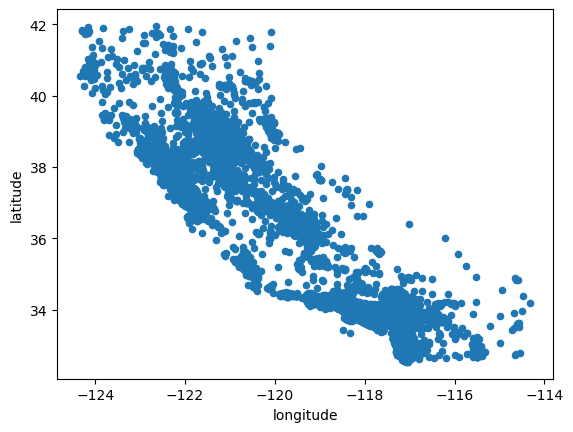

In [32]:
housing_test.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

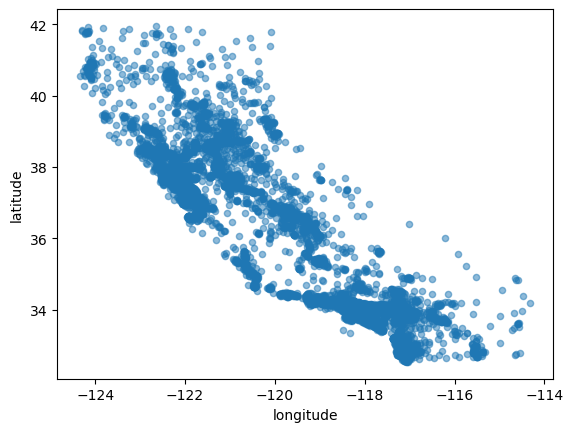

In [33]:
housing_test.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5)


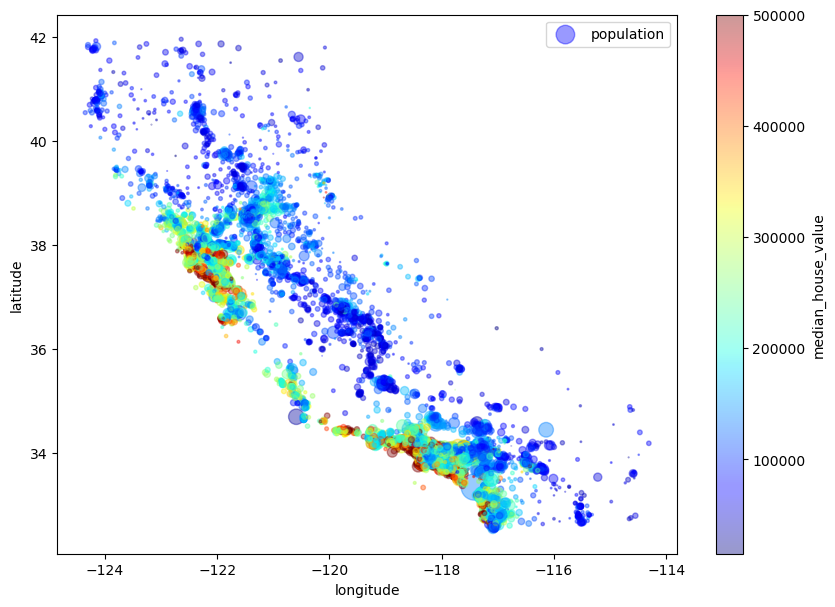

In [34]:
housing_test.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing_test["population"] / 100, label="population",
                  figsize=(10, 7), c="median_house_value",
                  cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

<Axes: xlabel='longitude', ylabel='latitude'>

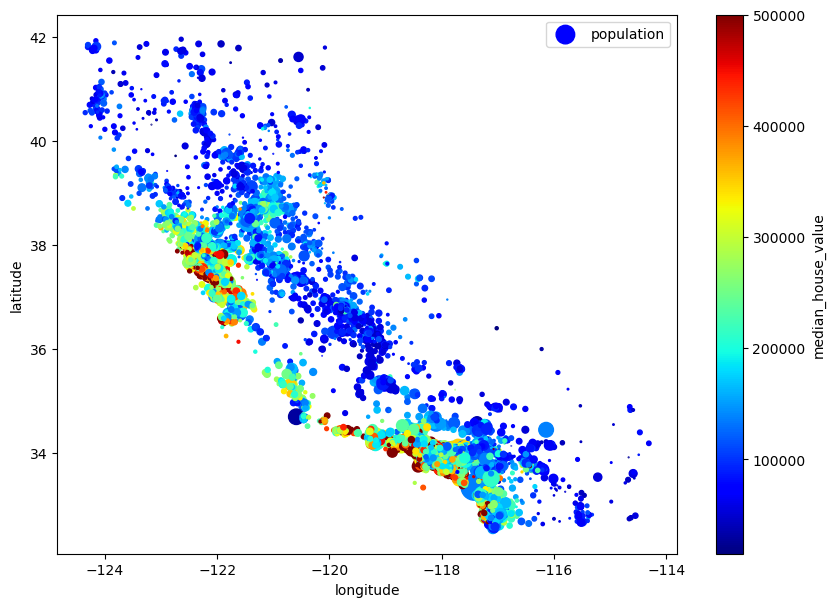

In [35]:
housing_test.plot(kind="scatter", x="longitude", y="latitude", 
                  s=housing_test["population"] / 100, label="population",
                  figsize=(10, 7), c="median_house_value",
                  cmap=plt.get_cmap("jet"), colorbar=True, )

In [ ]:
corr_matrix = housing_test.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing_test[attributes], figsize=(12, 8))

In [ ]:
housing_test.plot(kind="scatter", x="median_income",
                  y="median_house_value", alpha=0.1)

In [ ]:
housing_test["rooms_per_household"] = housing_test["total_rooms"] / housing_test["households"]
housing_test["bedrooms_per_room"] = housing_test["total_bedrooms"] / housing_test["total_rooms"]
housing_test["population_per_household"] = housing_test["population"] / housing_test["households"]

In [ ]:
corr_matrix = housing_test.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
# housing_test.drop("rooms_per_household", axis=1, inplace=True)

In [ ]:
housing_test.info()

In [70]:
# housing_copy = strat_train_set.drop("median_house_value", axis=1)
# # housing_labels_copy = strat_train_set.loc["median_house_value"].сору()
# housing_labels_copy = strat_train_set["median_house_value"].сору()

AttributeError: 'Series' object has no attribute 'сору'

In [ ]:
strat_train_set

In [ ]:
# housing_test.dropna(subset=["total_bedrooms"])
# housing_test.drop("total_bedrooms", axis=1)
median = housing_test["total_bedrooms"].median()
housing_test["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
housing_test

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [44]:
housing_num = housing_test.drop("ocean_proximity", axis=1)

In [46]:
imputer.fit(housing_num)

SimpleImputer()

In [ ]:
imputer.statistics_

In [ ]:
housing_num.median().values

In [48]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [ ]:
housing_cat = housing_test["ocean_proximity"]

In [ ]:
housing_cat.head(10)

In [ ]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [ ]:
housing_cat_encoded[:10]

In [ ]:
housing_categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() 

In [ ]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(- 1, 1))

In [ ]:
housing_cat_1hot

In [ ]:
housing_cat_1hot.toarray()

In [ ]:
from sklearn.preprocessing import CategoricalEncoder

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(- 1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

In [ ]:
cat_encoder = CategoricalEncoder (encoding="onehot-dense" )
housing_cat_lhot = cat_encoder . fit_transform (housing_cat_reshaped)
housing_cat_lhot

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder("onehot-dense")

In [ ]:
encoder.fit(x)

In [ ]:
cat_encoder = CategoricalEncoder (encoding="onehot-dense " )

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # нет *args

        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # не остается ничего другого

    def transform(self, Х, y=None):
        rooms_per_household = Х[:, rooms_ix] / Х[:, household_ix]
        population_per_household = Х[:, population_ix] / Х[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = Х[:, bedrooms_ix] / Х[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [53]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 16512 and the array at index 1 has size 20640

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        return X[self.attribute_names].values

In [61]:
from sklearn.preprocessing import OrdinalEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OrdinalEncoder()),
])

In [64]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [66]:
housing_prepared = full_pipeline.fit_transform(housing_test) 
housing_prepared

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels_copy)

NameError: name 'housing_prepared' is not defined

In [75]:
some_data = housing_test.iloc[:5]
some_labels = housing_labels_copy.iloc[:5]

In [74]:
some_data = housing_test.iloc[:5]
some_labels = housing_labels_copy.iloc[: 5]
some_data_prepared = full_pipeline.transform(some_data)
print("Прогнозы : ", lin_reg.predict(some_data_prepared))
print("Метки : ", list(some_labels))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [73]:
housing_labels_copy = strat_train_set["median_house_value"][:]